In [34]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [35]:
angrybird = cv.imread('../Data/angrybird.jpg')
angrybirdshow = cv.cvtColor(angrybird,cv.COLOR_BGR2RGB)

$$ cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) $$
* cv.calcHist() is a function in the OpenCV library that calculates the histogram of an image.
* **images**: the image(s) to calculate the histogram for. It can be passed in as a single image or a list of images.
* **channels**: the channel(s) to calculate the histogram for. It can be passed in as a single channel or a list of channels.
* **mask**: an optional mask to apply to the image(s) before calculating the histogram.
* **histSize**: the number of bins to use for the histogram.
* **ranges**: the range of values for the histogram.

* For Blue Color

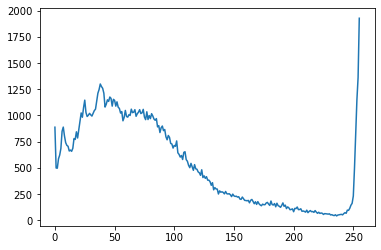

In [36]:
plt.plot(cv.calcHist([angrybird],[0],None,[256],[0,256]))

* For Green Color

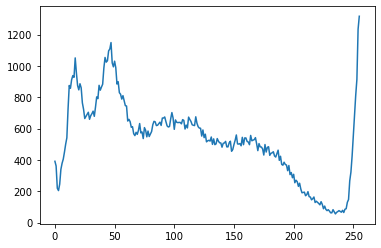

In [37]:
plt.plot(cv.calcHist([angrybird],[1],None,[256],[0,256]))

* For Red Color

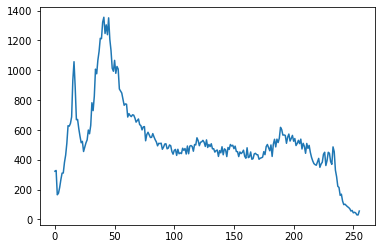

In [38]:
plt.plot(cv.calcHist([angrybird],[2],None,[256],[0,256]))

* We can plot all three color channel using loop

Text(0.5, 1.0, 'Histogram for Angrybirds')

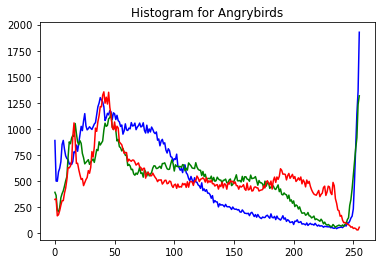

In [39]:
clr = ('b','g','r')
for i,clor in enumerate(clr):
    hgram = cv.calcHist([angrybird],[i],None,[256],[0,256])
    plt.plot(hgram,color = clor)
plt.title('Histogram for Angrybirds')

Text(0.5, 1.0, 'Histogram for Horse')

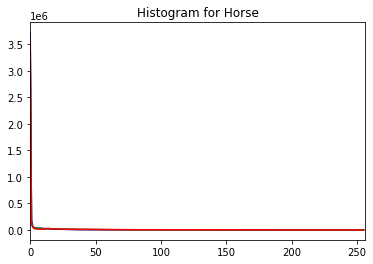

In [40]:
horse = cv.imread('../Data/horse.jpg')
clr = ('b','g','r')
for i,clor in enumerate(clr):
    hgram = cv.calcHist([horse],[i],None,[256],[0,256])
    plt.plot(hgram,color = clor)
    plt.xlim([0,256])
plt.title('Histogram for Horse')

Text(0.5, 1.0, 'Histogram for Horse')

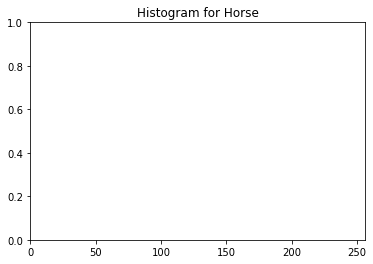

In [41]:
horse = cv.imread('../Data/horse.jpg')
clr = ('b','g','r')
for i,clor in enumerate(clr):
    hgram = cv.calcHist([horse],[i],None,[256],[0,256])
    plt.plot(hgram,color = clor)
    plt.xlim([0,256])
    plt.ylim([0,1.0])
plt.title('Histogram for Horse')

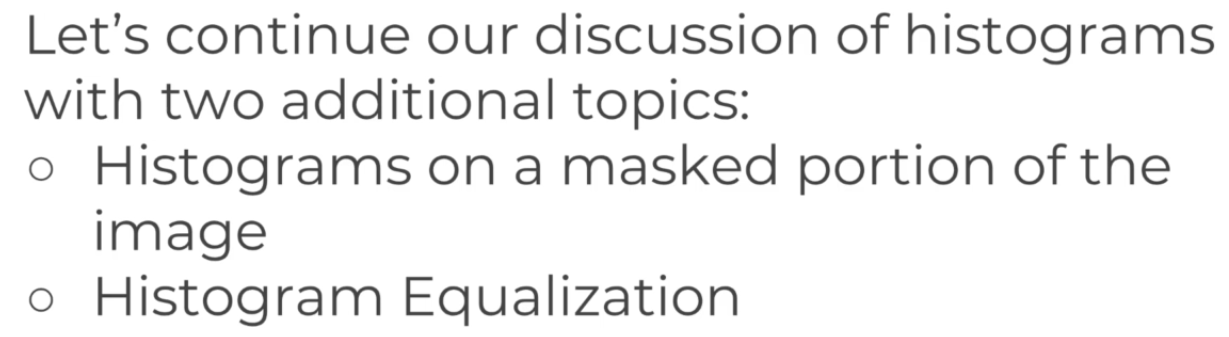

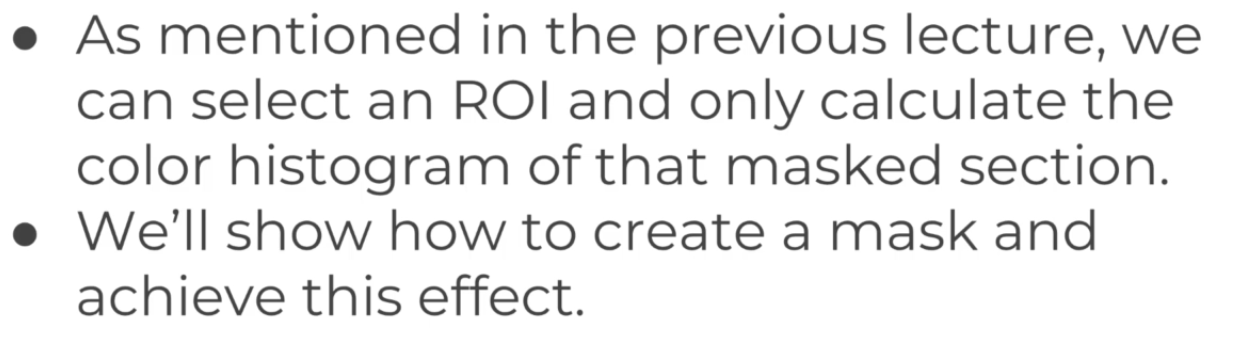

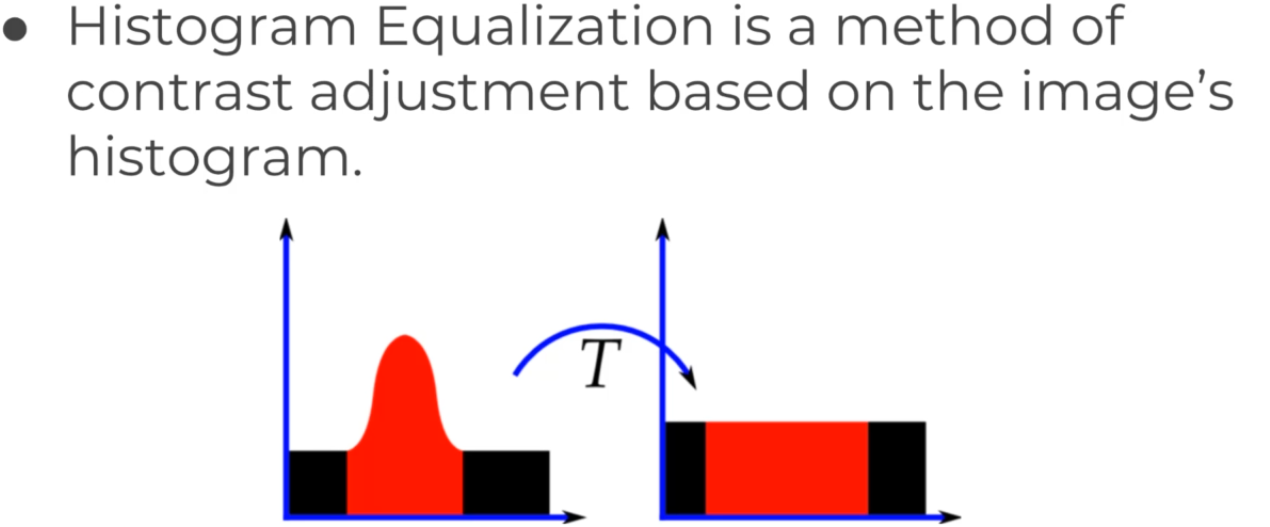

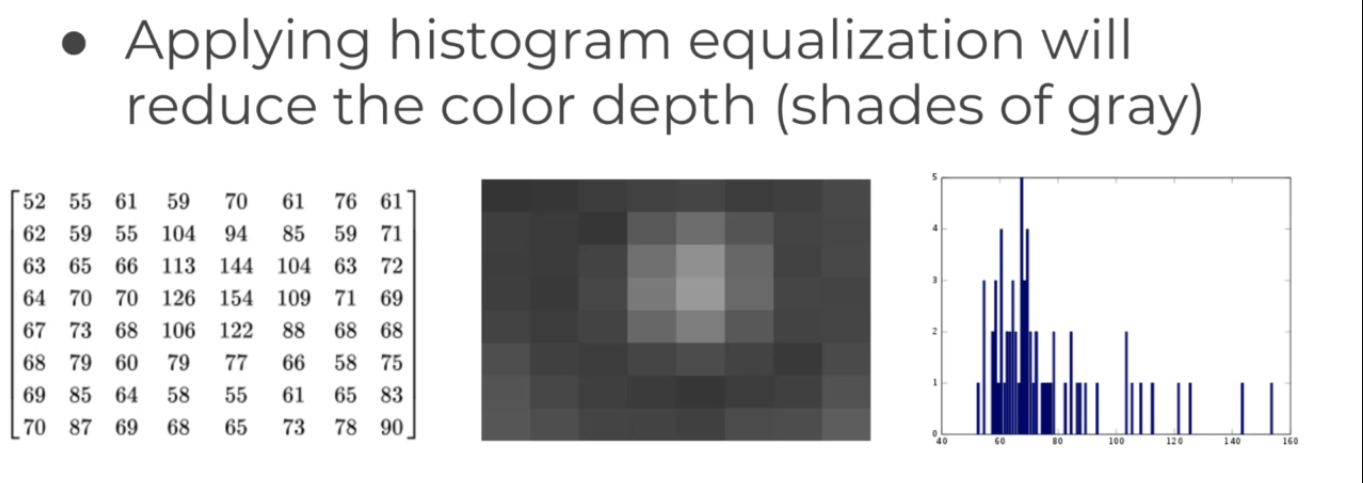

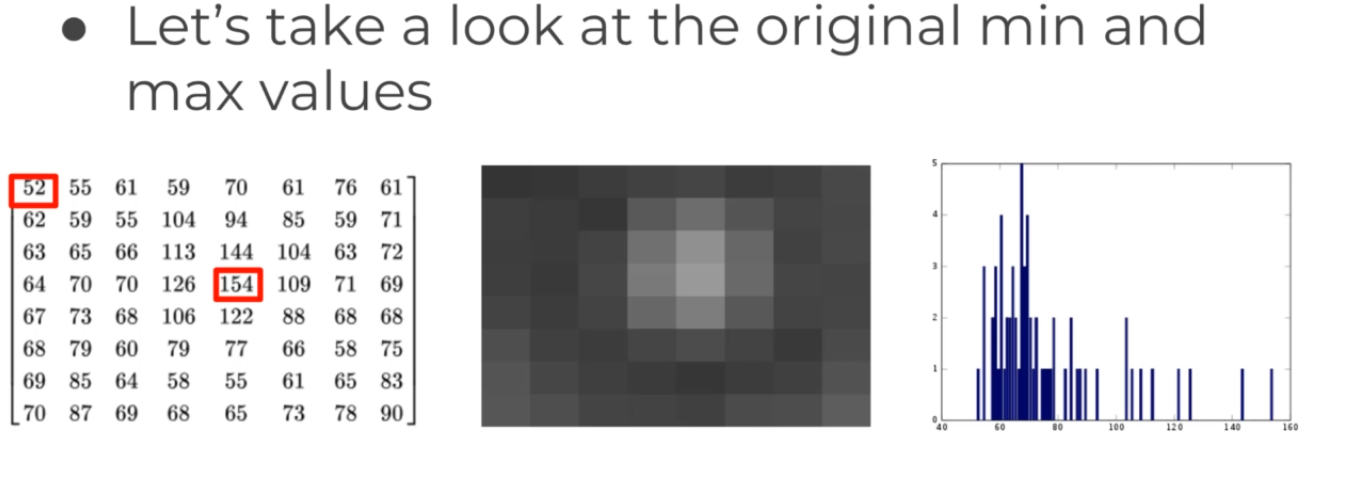
* Min value is 0. 
* Max value is 255.

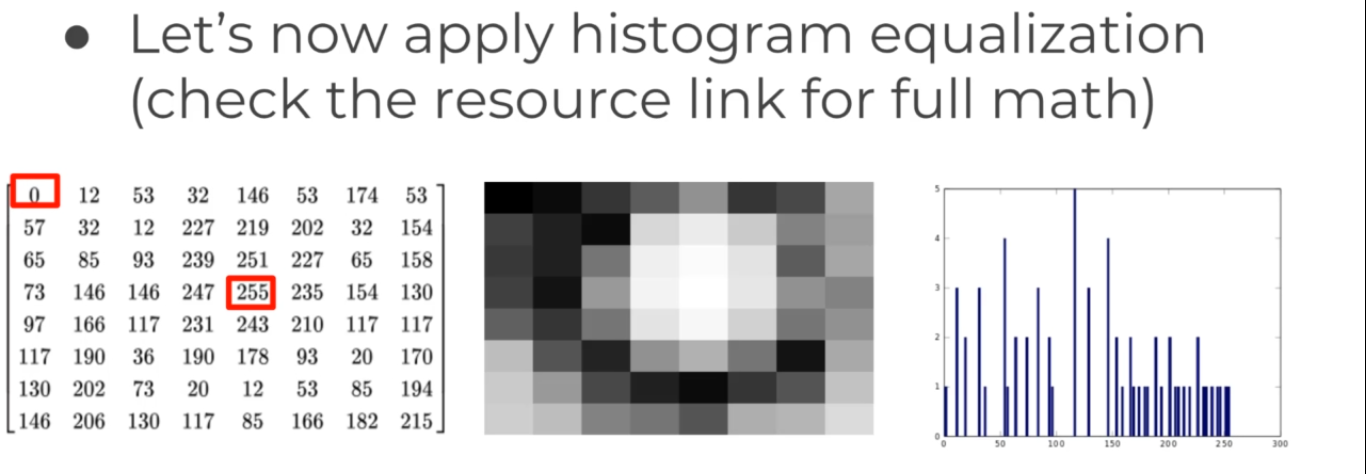
* The image is now high contrast.
* We have a clear border edges and histogram is more flattened out.
* Min and Max values are now equalized to 0 and 255.

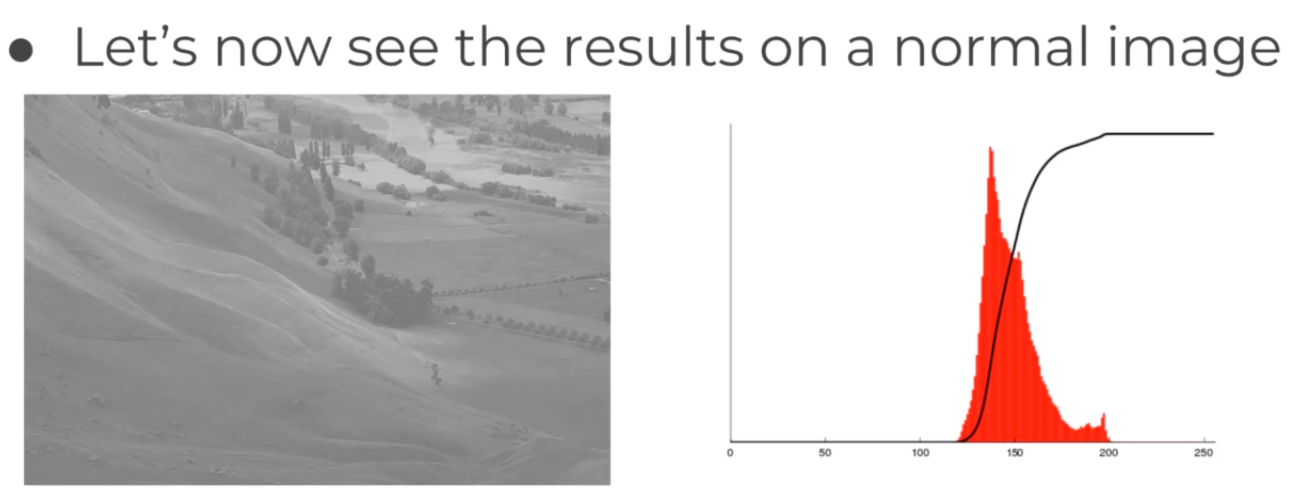
* The red color is representing the histogram.
* The black line is representing the cummulative histogram.

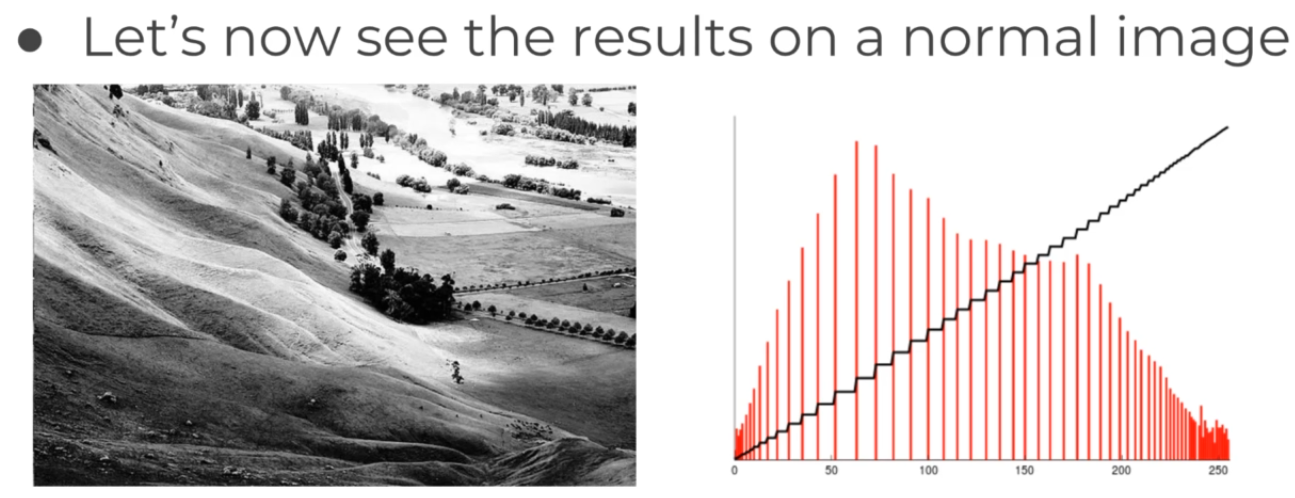

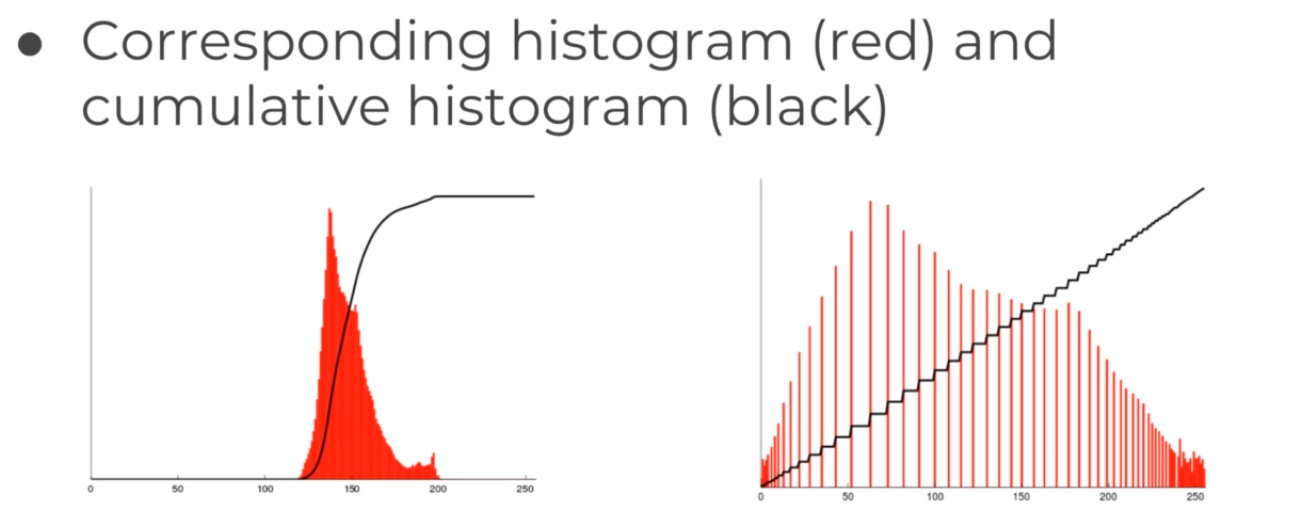
* Our goal is not to flatten the histogram but to make the cummulative line as linear as possible.

# Lets Create a Mask First

In [42]:
rainbow = cv.imread('../Data/rainbow.jpg')
showrainbow = cv.cvtColor(rainbow,cv.COLOR_BGR2RGB)

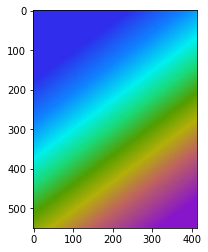

In [43]:
plt.imshow(rainbow)

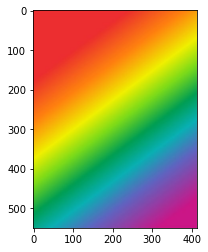

In [44]:
plt.imshow(showrainbow)

#### We will create a mask for rainbow

In [45]:
rainbow.shape

(550, 413, 3)

#### In mask only shape is required not color channels as the mask will be similar for all 3 color channels.

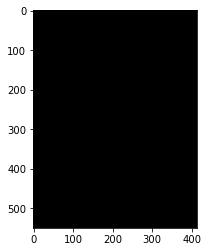

In [57]:
mask = np.zeros((rainbow.shape[:2]),np.uint8) # datatype of mask and the target img must be same
plt.imshow(mask,cmap = 'gray')

#### Lets select ROI(region of interest).

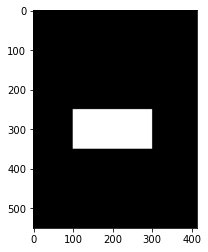

In [58]:
mask[250:350,100:300] = 255
plt.imshow(mask,cmap = 'gray')

#### Lets apply the bitwise operation of this mask with rainbow image

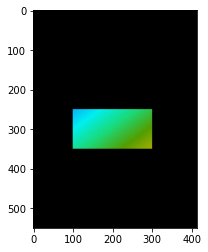

In [62]:
maskrainbow = cv.bitwise_and(rainbow,rainbow,mask = mask)
plt.imshow(maskrainbow)

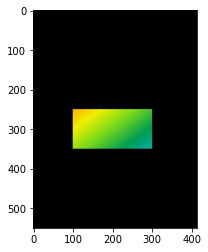

In [63]:
maskshowrainbow = cv.bitwise_and(showrainbow,showrainbow,mask = mask)
plt.imshow(maskshowrainbow)

Text(0.5, 1.0, 'RED HISTOGRAM FOR MASKED RAINBOW(BGR)')

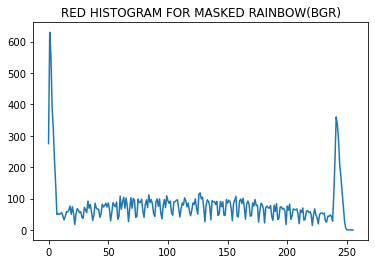

In [70]:
plt.plot(cv.calcHist([maskrainbow],[2],mask,[256],[0,256]))
plt.title('RED HISTOGRAM FOR MASKED RAINBOW(BGR)')

Text(0.5, 1.0, 'RED HISTOGRAM FOR MASKED RAINBOW(RBG)')

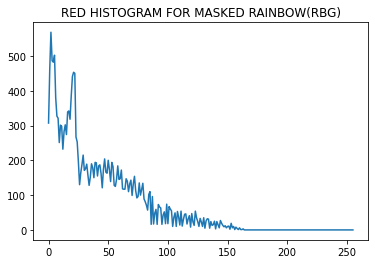

In [71]:
plt.plot(cv.calcHist([maskshowrainbow],[2],mask,[256],[0,256]))
plt.title('RED HISTOGRAM FOR MASKED RAINBOW(RBG)')

$$cv.equalizeHist(	src[, dst]	) ->	dst$$
* **src:** Source 8-bit single channel image.
* **dst:** Destination image of the same size and type as src .

In [74]:
grl = cv.imread('../Data/gorilla.jpg',0)

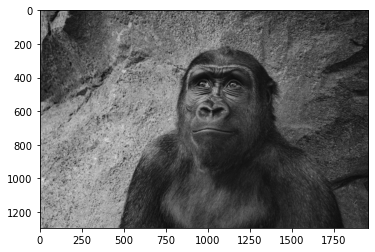

In [76]:
plt.imshow(grl,cmap = 'gray')

In [83]:
def disp(img):
    f = plt.figure(figsize=(15,15))
    f = f.add_subplot(111)
    f.imshow(img,cmap='gray')

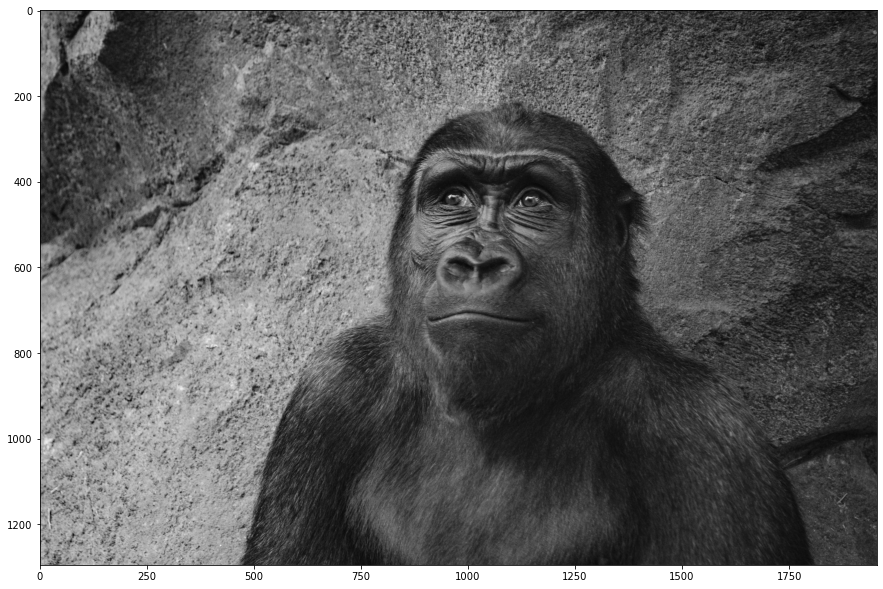

In [85]:
disp(grl)

#### Lets calculate histogram

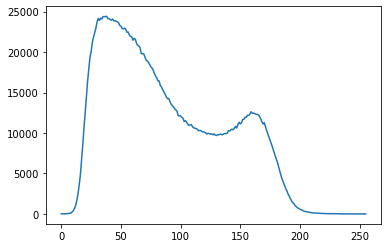

In [89]:
plt.plot(cv.calcHist([grl],[0],None,[256],[0,256]))

#### Lets apply equalizer function

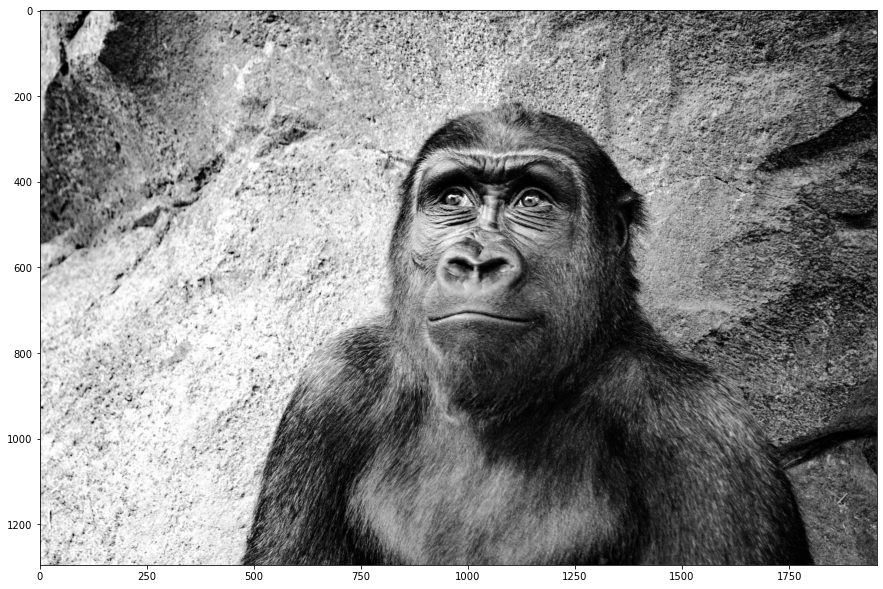

In [91]:
eq_grl = cv.equalizeHist(grl)
disp(eq_grl)

#### Checking the histogram again
* Graph is showing variation boost majorly.

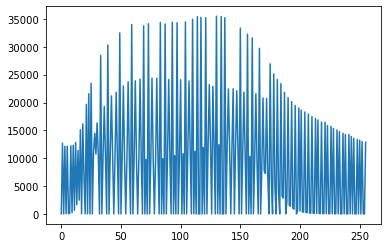

In [92]:
plt.plot(cv.calcHist([grl+eq_grl],[0],None,[256],[0,256]))

# Lets equalize color image of gorrila.
* The thing is we can't apply qualizer function to BGR or RGB channeled image.
* We need to convert this image to HSV(hue[0] , saturation[1] , value[2]).
* Access the value part and apply equalizer function to that part only.
* **img[row,column,H(0)|S(1)|V(2)]**.

In [111]:
grl = cv.imread('../Data/gorilla.jpg')
grl = cv.cvtColor(grl,cv.COLOR_BGR2RGB)

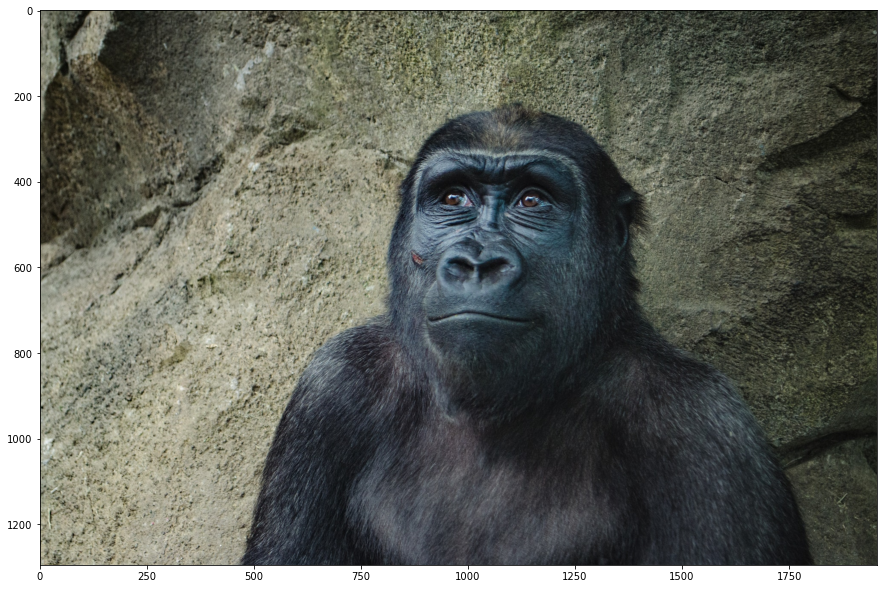

In [112]:
disp(grl)

In [114]:
grl_hsv = cv.cvtColor(grl,cv.COLOR_BGR2HSV)

In [115]:
grl_hsv[:,:,2] = cv.equalizeHist(grl_hsv[:,:,2])

In [116]:
grl_hsv_rgb = cv.cvtColor(grl_hsv,cv.COLOR_HSV2RGB)

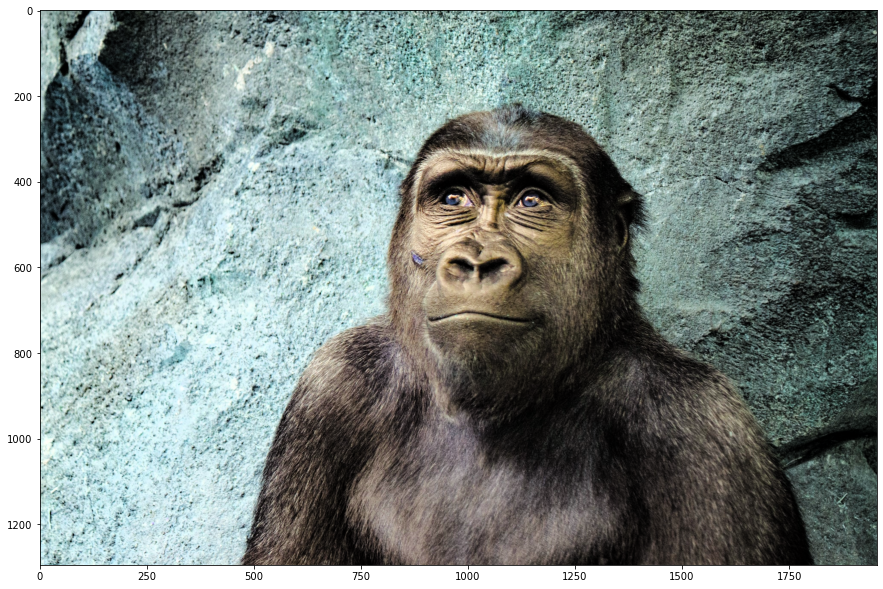

In [117]:
disp(grl_hsv_rgb)